In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S4_Datafile_Practice.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
data = df['Close']

In [5]:
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

In [6]:
model = SARIMAX(
    train,
    order=(1, 0, 1),
    seasonal_order=(3, 1, 1, 12)
)

model_fit = model.fit(disp=False)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [7]:
forecast = model_fit.forecast(steps=len(test))

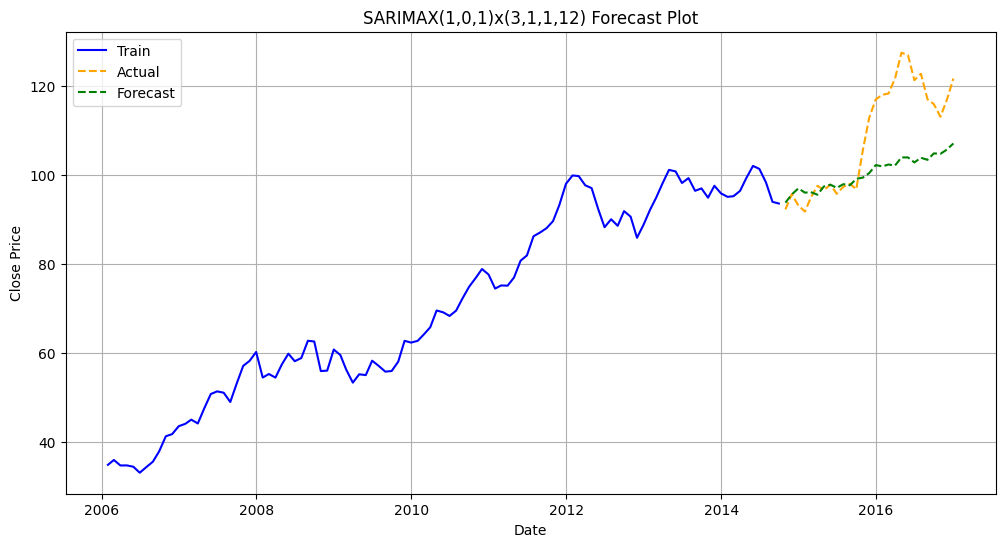

In [8]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')

plt.title("SARIMAX(1,0,1)x(3,1,1,12) Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()